In [11]:
import os
import pathlib

import tensorflow as tf 
from tensorflow import keras
from keras import layers

import numpy as np
import librosa
import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [7]:
# Comparing the same verse by two different reciters
# Second verse of Al-Fatihah
v1, sampling_rate_1 = librosa.load(r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data\1\2\1_2_abdulbasitmurattal.mp3')
v2, sampling_rate_2 = librosa.load(r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data\1\2\1_2_abdurrahmaansudais.mp3')

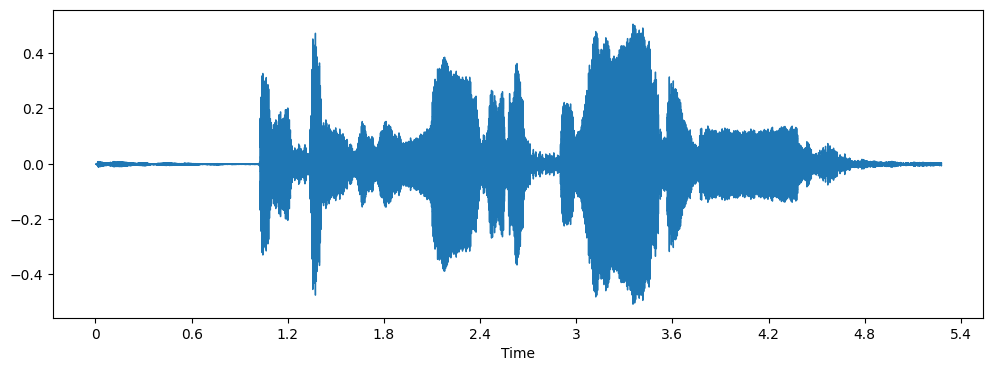

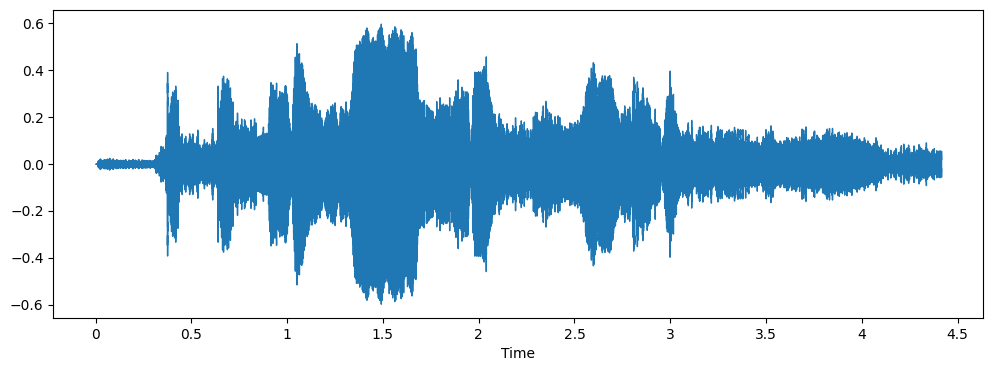

In [8]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(v1, sr=sampling_rate_1)

plt.figure(figsize=(12,4))
librosa.display.waveshow(v2, sr=sampling_rate_2)

The length of the verses of the Quran vary greatly. Moreover, the style of the reciter can be fast or slow, or deliberately meticulous (Mujawwad style), which adds more variability to the samples.

We can add a dummy padding to the audio samples to make them the same length as the longest audio sample (of any recitation of any verse).

This modification should not affect the accuracy of the model, because more variability means more samples will be padded, and this will almost be an invariant feature of the samples. So if the model is good, it will ignore the padding as a relevant feature in the classification task.

In [12]:
# Path to total data
data_dir = pathlib.Path(r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data')

# Split into train and validation sets
train_ds, val_ds = keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=RANDOM_SEED,
    subset='both'
)

# Check label names
label_names = np.array(train_ds.class_names)

Found 0 files belonging to 13 classes.
Using 0 files for training.


ValueError: No training audio files found in directory C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data. Allowed format(s): ('.wav',)

In [ ]:

# Shard validation into test and validation
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)